In [146]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats


In [147]:
#convert the CSV to a Pandas Dataframe 
df = pd.read_csv('deepsolar_tract.csv', encoding='latin1')


In [242]:
# take the dataframe and exclude rows with a zero value for solar system count these are being exclude
# so that we can examine the population of solar pannels. 

greater_than_zero = df.solar_system_count > 0
exclude_zero = df[greater_than_zero]
Solarmetrics = exclude_zero.loc[:,['solar_system_count', 'total_panel_area']]     

#create a dataframe with collection information 
Datametrics = df.loc[:,['tile_count']]                     
    
popmetrics = df.loc[:,['tile_count', 'total_panel_area',
                                   'solar_panel_area_divided_by_area']]    

Climatemetrics = df.loc[:,['tile_count', 'total_panel_area',
                                   'solar_panel_area_divided_by_area']]    
    
total_rows = Solarmetrics.count()
print( total_rows)

solar_system_count    56258
total_panel_area      56258
dtype: int64


count    56258.000000
mean        26.068293
std         60.326822
min          1.000000
25%          2.000000
50%          6.000000
75%         22.000000
max       1535.000000
Name: solar_system_count, dtype: float64
mode=  0    1.0
dtype: float64


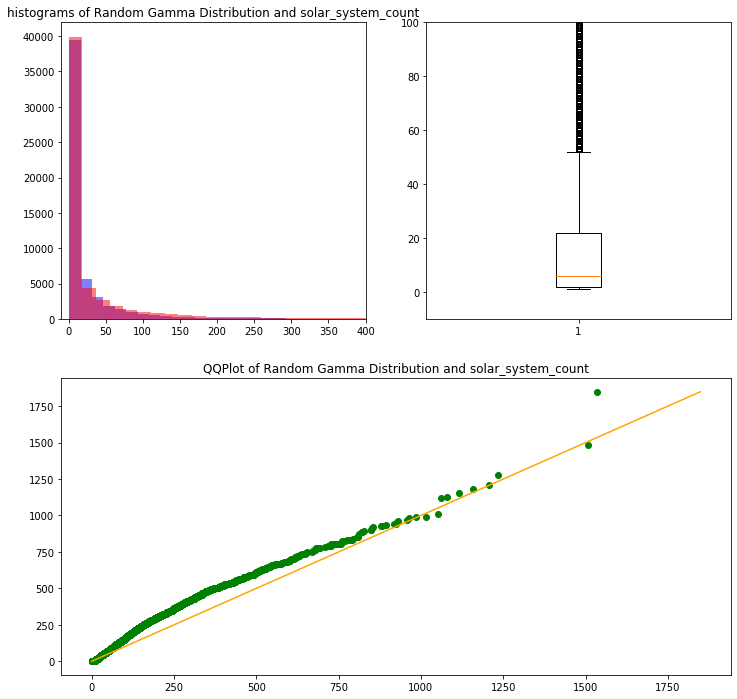

In [253]:
#number of solar power systems (after merging)

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.hist(Solarmetrics['solar_system_count'],bins=100, color='blue', alpha=0.5)

# Generate a gamma distribution with shape=5 and scale=1
gamma = np.random.gamma(0.17,200, 56258)

# Plot a histogram of solar system counts with an overlayed gamma distribution.
plt.hist(gamma,bins=100, color='red', alpha=0.5 )
plt.xlim(-10, 400)

plt.title('histograms of Random Gamma Distribution and solar_system_count')

#Generate a Box Plot of solar system counts
plt.subplot(2, 2, 2)
plt.boxplot(Solarmetrics['solar_system_count'])
plt.ylim(-10, 100)

#Generate a QQ plot of the gamma distribution and the solar system counts 
plt.subplot(2, 1, 2)
orderd_gamma = sorted(gamma)
ordered_data=Solarmetrics['solar_system_count'].sort_values(ascending=True)
plt.scatter(ordered_data,orderd_gamma, color = 'green')
plt.plot(orderd_gamma,orderd_gamma,color= 'orange')
plt.title('QQPlot of Random Gamma Distribution and solar_system_count')
plt.show
print(Solarmetrics['solar_system_count'].describe())
print('mode= ', Solarmetrics['solar_system_count'].mode())


count     56258.000000
mean       1719.427425
std        6882.445478
min           1.813267
25%          76.179894
50%         292.496128
75%        1167.049676
max      592031.075018
Name: total_panel_area, dtype: float64
mode=  0    9.515475
dtype: float64


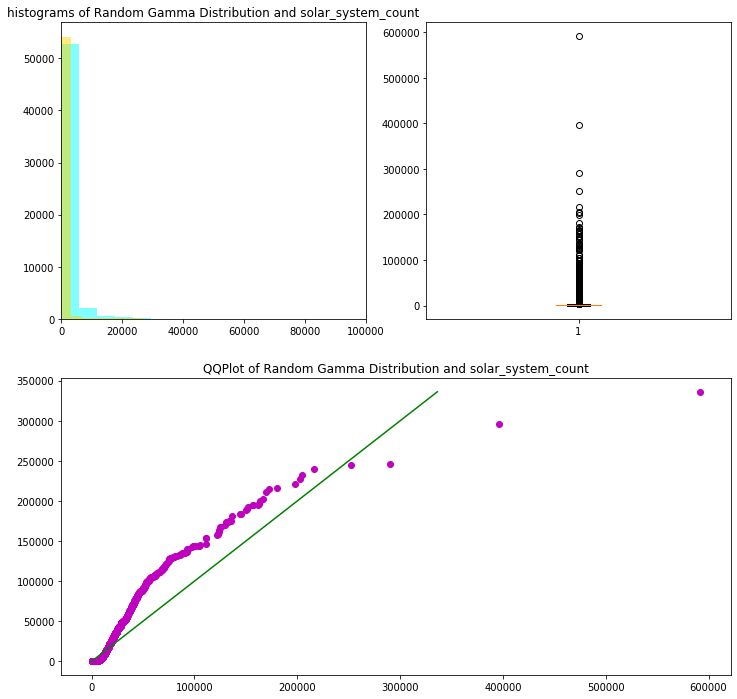

In [246]:
#sumary statistics on Total Pannel Area

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.hist(Solarmetrics['total_panel_area'], bins=100, color='cyan', alpha=0.5)

# Generate a gamma distribution with shape=5 and scale=1
gamma = np.random.gamma(.015,592031.075018/8, 56258)

# Plot a histogram of solar system counts with an overlayed gamma distribution.
plt.hist(gamma, bins=100, color='gold', alpha=0.5 )
plt.xlim(-10, 100000)

plt.title('histograms of Random Gamma Distribution and solar_system_count')

#Generate a Box Plot of solar system counts
plt.subplot(2, 2, 2)
plt.boxplot(Solarmetrics['total_panel_area'])
#plt.ylim(-10, 100)

#Generate a QQ plot of the gamma distribution and the solar system counts 
plt.subplot(2, 1, 2)
orderd_gamma = sorted(gamma)
ordered_data=Solarmetrics['total_panel_area'].sort_values(ascending=True)
plt.scatter(ordered_data,orderd_gamma, color = 'm')
plt.plot(orderd_gamma,orderd_gamma,color= 'green')
plt.title('QQPlot of Random Gamma Distribution and total_panel_area')
plt.show
print(Solarmetrics['total_panel_area'].describe())
print('mode= ', Solarmetrics['total_panel_area'].mode())

Im not sure if the Gamma distribution is appropriate for this data set

ValueError: x and y must be the same size

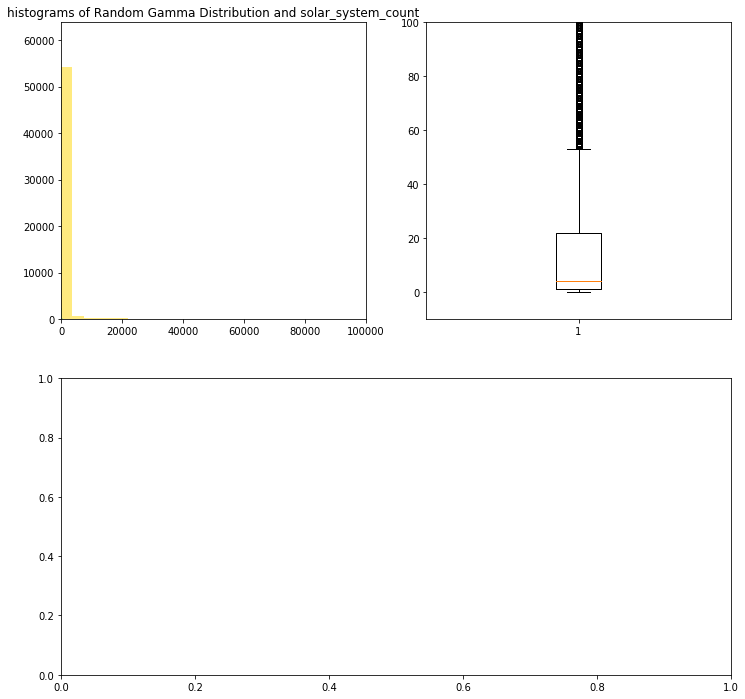

In [245]:
#Summary statistics on Tile counts
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.hist(Datametrics['tile_count'], bins=100, color='cyan', alpha=0.5)

# Generate a gamma distribution with shape=5 and scale=1
gamma = np.random.gamma(.015,592031.075018/8, 56258)

# Plot a histogram of solar system counts with an overlayed gamma distribution.
plt.hist(gamma, bins=100, color='gold', alpha=0.5 )
plt.xlim(-10, 100000)

plt.title('histograms of Random Gamma Distribution and solar_system_count')

#Generate a Box Plot of solar system counts
plt.subplot(2, 2, 2)
plt.boxplot(Datametrics['tile_count'])
plt.ylim(-10, 100)

#Generate a QQ plot of the gamma distribution and the solar system counts 
plt.subplot(2, 1, 2)
orderd_gamma = sorted(gamma)
ordered_data=Datametrics['tile_count'].sort_values(ascending=True)
plt.scatter(ordered_data,orderd_gamma, color = 'm')
plt.plot(orderd_gamma,orderd_gamma,color= 'green')
plt.title('QQPlot of Random Gamma Distribution and tile_count')
plt.show
print(Datametrics['tile_count'].describe())
print('mode= ', Datametrics['total_panel_area'].mode())

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(Solarmetrics['total_panel_area'],bins=100)

plt.subplot(1, 2, 2)
plt.boxplot(Solarmetrics['total_panel_area'])
plt.show
print(Solarmetrics['total_panel_area'].describe())
print(Solarmetrics['total_panel_area'].mode())

In [ ]:
#number of image tiles containing non-residential solar power system
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(Solarmetrics['solar_panel_area_per_capita'])

plt.subplot(1, 2, 2)
plt.boxplot(Solarmetrics['solar_panel_area_per_capita'])
plt.show
print(Solarmetrics['solar_panel_area_per_capita'].describe())
print(Solarmetrics['solar_panel_area_per_capita'].mode())

count    56258.000000
mean        22.713107
std         54.555759
min          0.000000
25%          2.000000
50%          5.000000
75%         19.000000
max       1404.000000
Name: solar_system_count_residential, dtype: float64
0    1.0
dtype: float64


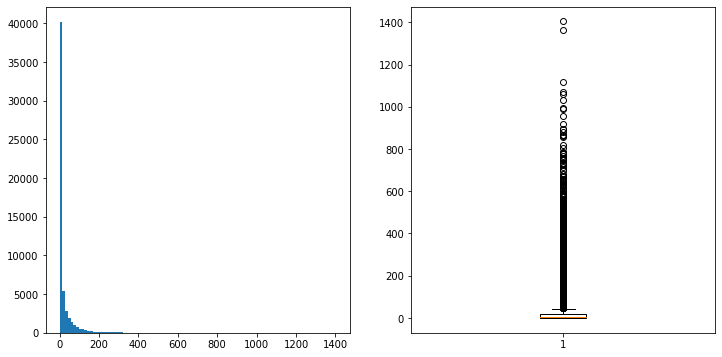

In [202]:
#number of residential solar power systems (after merging)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(Solarmetrics['solar_system_count_residential'],bins=100)

plt.subplot(1, 2, 2)
plt.boxplot(Solarmetrics['solar_system_count_residential'])
plt.show
print(Solarmetrics['solar_system_count_residential'].describe())
print(Solarmetrics['solar_system_count_residential'].mode())

count    56258.000000
mean         3.355185
std          9.076814
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        397.000000
Name: solar_system_count_nonresidential, dtype: float64
0    0.0
dtype: float64


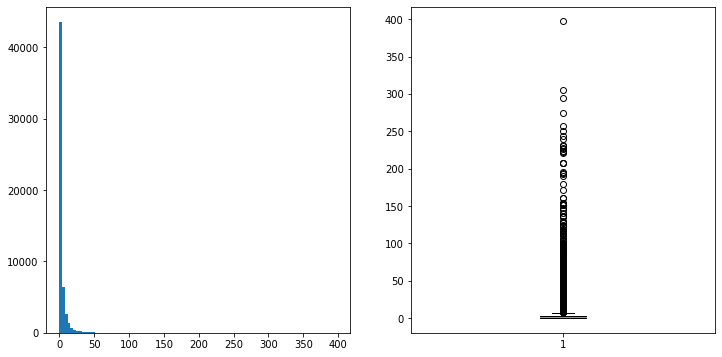

In [87]:
#number of non-residential solar power systems (after merging)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(Solarmetrics['solar_system_count_nonresidential'], bins=100)

plt.subplot(1, 2, 2)
plt.boxplot(Solarmetrics['solar_system_count_nonresidential'])
plt.show
print(Solarmetrics['solar_system_count_nonresidential'].describe())
print(Solarmetrics['solar_system_count_nonresidential'].mode())

count    72537.000000
mean        14.107986
std          8.656047
min          0.000000
25%          9.000000
50%         14.000000
75%         20.000000
max         35.000000
Name: net_metering, dtype: float64
mode=  0    9
dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

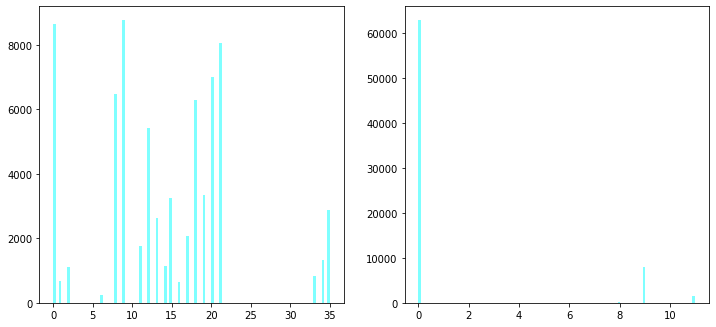

In [252]:
# analysis of states and laws and 
StateAnalysis = df.loc[:,[ 'state','net_metering','feedin_tariff','incentive_nonresidential_state_level','incentive_residential_state_level','incentive_count_nonresidential','incentive_count_residential','population_density']]

#Summary statistics on Tile counts
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.hist(StateAnalysis['net_metering'], bins=100, color='cyan', alpha=0.5)
print(StateAnalysis['net_metering'].describe())
print('mode= ', StateAnalysis['net_metering'].mode())

#plt.title('histograms of Random Gamma Distribution and solar_system_count')

#Generate a Box Plot of solar system counts
plt.subplot(2, 2, 2)
plt.hist(StateAnalysis['feedin_tariff'], bins=100, color='cyan', alpha=0.5)
#Generate a QQ plot of the gamma distribution and the solar system counts 
#plt.subplot(1, 1, 1)
#plt.hist(StateAnalysis['incentive_nonresidential_state_level'], bins=100, color='cyan', alpha=0.5)

#plt.subplot(1, 1, 1)
#plt.hist(StateAnalysis['incentive_residential_state_level'], bins=100, color='cyan', alpha=0.5)

plt.show
